### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
X_st = X.copy().astype(np.float64)

In [5]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
for i in range(1, X.shape[0]):
    X_st[i] = calc_std_fit(X[i])

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

In [9]:
l_W = []
l_lambda = np.linspace(1e-8, 1e+2, 100)
for i in range(len(l_lambda)):
    W = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l_lambda[i])
    l_W.append(W)

In [10]:
l_lambda

array([1.00000000e-08, 1.01010102e+00, 2.02020203e+00, 3.03030304e+00,
       4.04040405e+00, 5.05050506e+00, 6.06060607e+00, 7.07070708e+00,
       8.08080809e+00, 9.09090910e+00, 1.01010101e+01, 1.11111111e+01,
       1.21212121e+01, 1.31313131e+01, 1.41414142e+01, 1.51515152e+01,
       1.61616162e+01, 1.71717172e+01, 1.81818182e+01, 1.91919192e+01,
       2.02020202e+01, 2.12121212e+01, 2.22222222e+01, 2.32323232e+01,
       2.42424243e+01, 2.52525253e+01, 2.62626263e+01, 2.72727273e+01,
       2.82828283e+01, 2.92929293e+01, 3.03030303e+01, 3.13131313e+01,
       3.23232323e+01, 3.33333333e+01, 3.43434344e+01, 3.53535354e+01,
       3.63636364e+01, 3.73737374e+01, 3.83838384e+01, 3.93939394e+01,
       4.04040404e+01, 4.14141414e+01, 4.24242424e+01, 4.34343434e+01,
       4.44444445e+01, 4.54545455e+01, 4.64646465e+01, 4.74747475e+01,
       4.84848485e+01, 4.94949495e+01, 5.05050505e+01, 5.15151515e+01,
       5.25252525e+01, 5.35353535e+01, 5.45454546e+01, 5.55555556e+01,
      

In [11]:
l_W[:10]

[array([56.49999962,  6.19560095,  0.13438971,  6.17194872]),
 array([37.54026833,  4.00133664,  2.67439468,  3.67939101]),
 array([28.10804013,  3.25880018,  2.56091482,  3.0727851 ]),
 array([22.46385538,  2.79061819,  2.33508029,  2.67059956]),
 array([18.70735783,  2.45184396,  2.12174698,  2.36820175]),
 array([16.02722061,  2.19089694,  1.93614693,  2.12944993]),
 array([14.01879698,  1.98218327,  1.77704487,  1.93528965]),
 array([12.45768373,  1.81081428,  1.64046815,  1.77398225]),
 array([11.20941883,  1.66729614,  1.52250453,  1.63770804]),
 array([10.18852458,  1.54519989,  1.41985622,  1.52099699])]

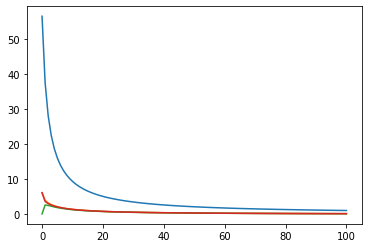

In [12]:
plt.plot(l_lambda, l_W)
plt.show()

#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Мы можем применить сначала стандартизацию, а потом нормализацию. Так как стандартизация заключается в своего рода отклонении каждого признака от среднего, соответсвенно оно может быть досаточно большим по модулю, дальше мы можем нормализовать эти отклонения по шкале от 0 до 1. 
Фактически мы можем применть и в обратном порядке - сначала нормализовать, а потом стандартизировать. Но не совсем понятно какой в этом смысл.

#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [13]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
    return W

In [14]:
l_W = []
l_lambda = np.linspace(1e-8, 1e+2, 100)
for i in range(len(l_lambda)):
    W = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=l_lambda[i])
    l_W.append(W)

In [15]:
l_W[:10]

[array([56.4999999 ,  6.195601  ,  0.13438958,  6.17194881]),
 array([5.59949494e+01, 5.93085003e+00, 3.46906405e-02, 5.94851085e+00]),
 array([5.54898989e+01, 5.64181811e+00, 1.75378640e-02, 5.69461359e+00]),
 array([5.49848484e+01, 5.33753406e+00, 1.77124357e-03, 5.41069998e+00]),
 array([5.44797979e+01, 5.03185291e+00, 2.66120430e-02, 5.11643195e+00]),
 array([5.39747474e+01, 4.73466886e+00, 9.11945918e-03, 4.82662530e+00]),
 array([5.34696969e+01, 4.43810646e+00, 3.18948195e-03, 4.53430397e+00]),
 array([5.29646464e+01, 4.14052552e+00, 7.57363271e-03, 4.23850708e+00]),
 array([5.24595959e+01, 3.84016262e+00, 2.48863199e-02, 3.93826664e+00]),
 array([51.95454536,  3.53880175,  0.05571554,  3.63581989])]